Data loaded successfully!
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Descriptive

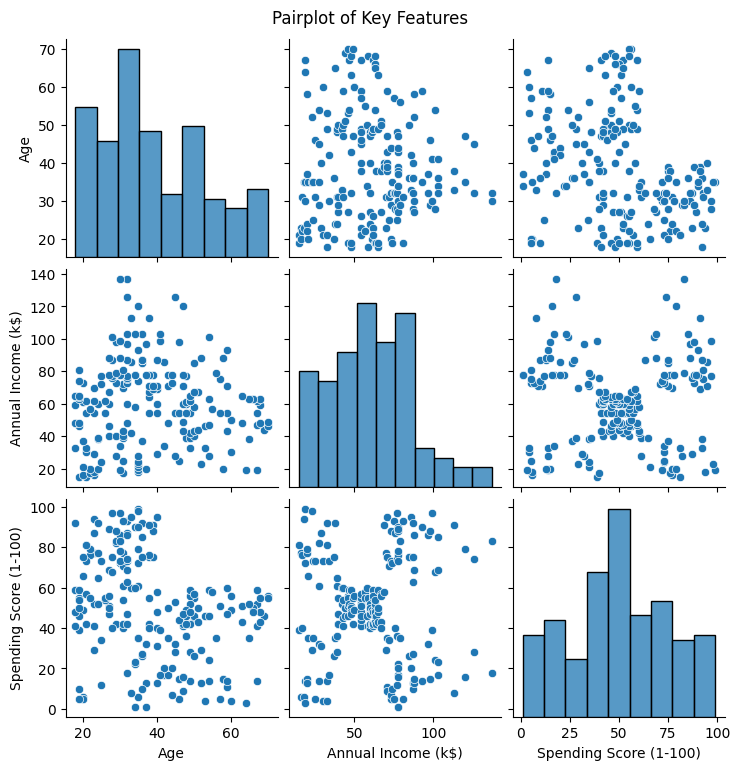

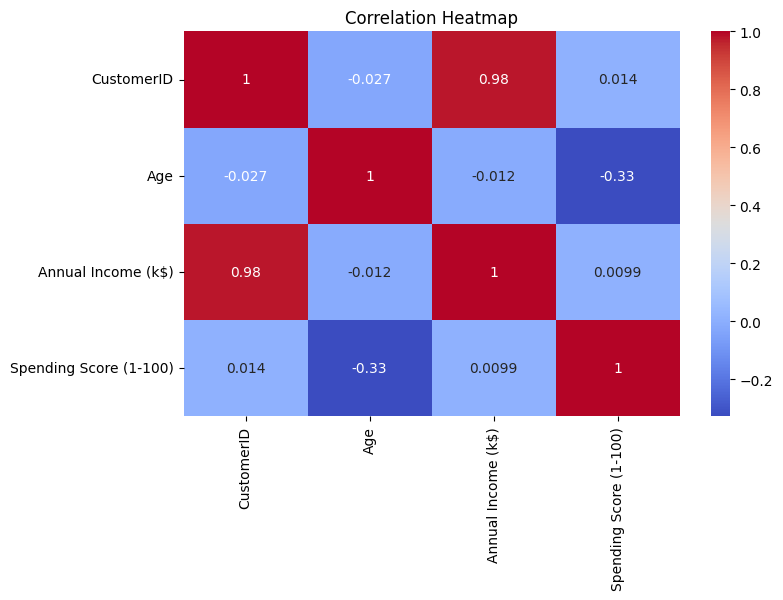

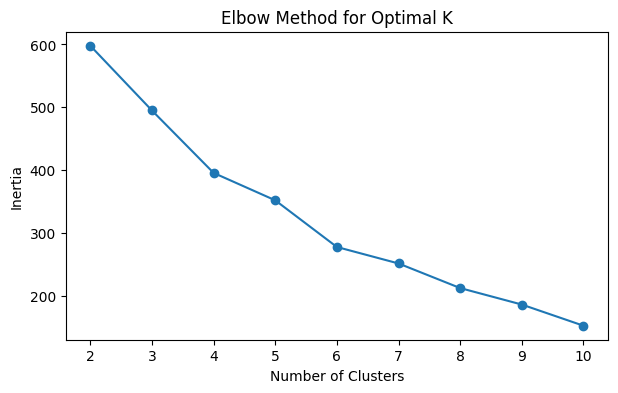


Cluster Centers (Scaled Features):
[[ 0.14062401  1.26457129 -0.55200479 -0.42262217]
 [ 1.12815215  0.04664835  0.93858626 -1.40339942]
 [ 1.12815215 -0.72911539  0.01315937  0.77791013]
 [-0.88640526 -0.06832482  0.82302637  0.16495202]
 [-0.88640526 -0.82777211 -0.82895964  0.23333801]]

K-Means Silhouette Score: 0.272


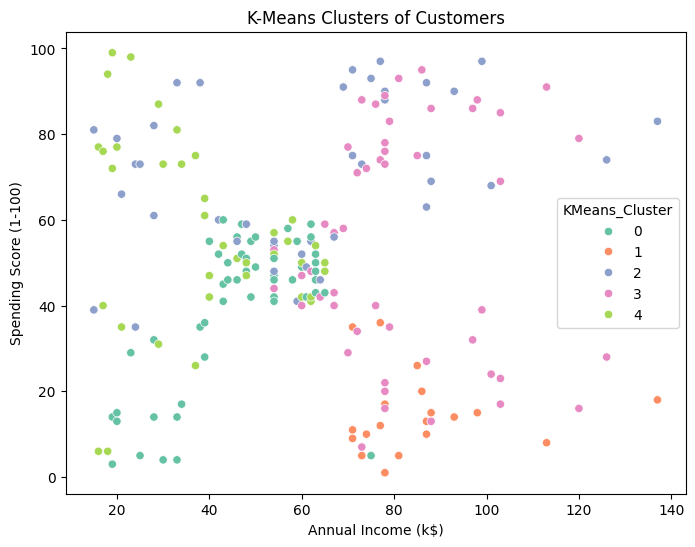


Agglomerative Clustering Silhouette Score: 0.287


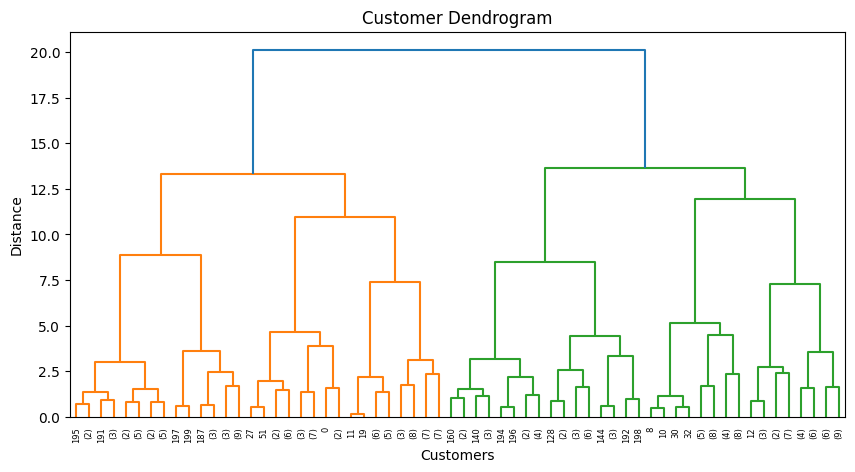

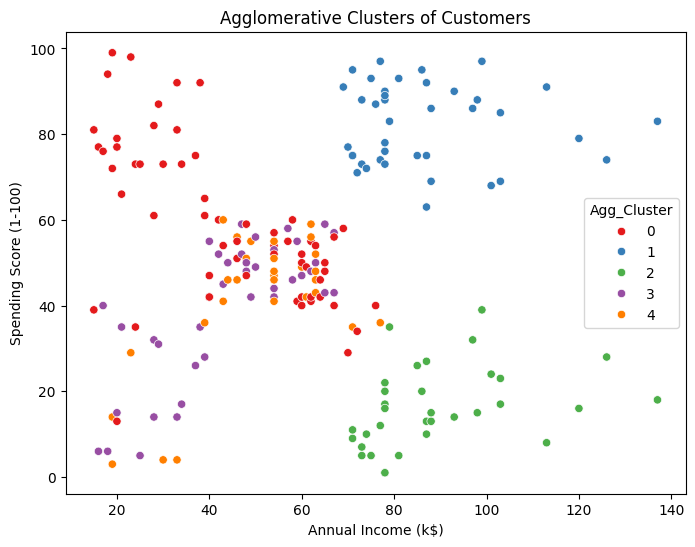


Cluster Averages (K-Means):
                      Age  Annual Income (k$)  Spending Score (1-100)
KMeans_Cluster                                                       
0               56.470588           46.098039               39.313725
1               39.500000           85.150000               14.050000
2               28.690476           60.904762               70.238095
3               37.897959           82.122449               54.448980
4               27.315789           38.842105               56.210526

Clustered data saved to Mall_Customers_Clustered.csv


In [ ]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

# 2. Load the Dataset
# You can download from:
# https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

data = pd.read_csv(r"C:\Users\Blake Powell\Downloads\Mall_Customers.csv")
print("Data loaded successfully!")
print(data.head())

# 3. Data Overview
print("\nBasic Info:")
print(data.info())

print("\nDescriptive Statistics:")
print(data.describe())

# 4. Data Visualization
sns.pairplot(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()

plt.figure(figsize=(8,5))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# 5. Preprocessing
# Encode Gender (Male=0, Female=1)
encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])

# Select relevant features for clustering
X = data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Determine Optimal Number of Clusters (Elbow Method)
inertia = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(7,4))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# 7. Apply K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_scaled)
data['KMeans_Cluster'] = clusters_kmeans

print("\nCluster Centers (Scaled Features):")
print(kmeans.cluster_centers_)

# Evaluate using Silhouette Score
score_kmeans = silhouette_score(X_scaled, clusters_kmeans)
print(f"\nK-Means Silhouette Score: {score_kmeans:.3f}")

# 8. Visualize K-Means Results
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='KMeans_Cluster',
    data=data,
    palette='Set2'
)
plt.title("K-Means Clusters of Customers")
plt.show()

# 9. Apply Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=5, linkage='ward')
clusters_agg = agg.fit_predict(X_scaled)
data['Agg_Cluster'] = clusters_agg

score_agg = silhouette_score(X_scaled, clusters_agg)
print(f"\nAgglomerative Clustering Silhouette Score: {score_agg:.3f}")

# 10. Dendrogram Visualization
plt.figure(figsize=(10,5))
Z = linkage(X_scaled, method='ward')
dendrogram(Z, truncate_mode='level', p=5)
plt.title('Customer Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.show()

# 11. Agglomerative Cluster Visualization
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Agg_Cluster',
    data=data,
    palette='Set1'
)
plt.title("Agglomerative Clusters of Customers")
plt.show()

# 12. Analyze and Compare Clusters
cluster_summary = data.groupby('KMeans_Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print("\nCluster Averages (K-Means):")
print(cluster_summary)

# 13. Save Results
data.to_csv("Mall_Customers_Clustered.csv", index=False)
print("\nClustered data saved to Mall_Customers_Clustered.csv")
